# HydroTrend, Ganges Basin, Q0 Climate Scenario


### Created By: Abby Eckland and Irina Overeem, March 2020
_____________________________________________________________________________________________

### About this notebook
This notebook replicates and improves upon simulations originally run by Frances Dunn and Stephen Darby, reported in Darby et al. 2015.

This simulation is driven by climate predictions (daily temperature and precipitation) obtained from the Hadley Centre (HadRM3P) Regional Climate Model. The Q0 realization is utilized in this notebook.

At the end of this notebook, questions are available to help analyze the model outputs.

See the following links for more informaton and resources regarding the model HydroTrend: <br>
https://csdms.colorado.edu/wiki/Model_help:HydroTrend <br>
https://csdms.colorado.edu/wiki/Model:HydroTrend <br>
______________________________________________________________________________________________________

## 125 year simulation: 1975-2100

In [1]:
# Import numpy and matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the pymt package 
import pymt.models
# Create new instance
# With each new run, it is wise to rename the instance
hydrotrend_GQ0 = pymt.models.Hydrotrend()

➡ models: Avulsion, Plume, Sedflux3D, Subside, FrostNumber, Ku, Hydrotrend, Cem, Waves


In [3]:
# Add directory for output files
config_file, config_folder = "hydro_config.txt", "Ganges"

Note that the following "cat" commands will allow you to view your input files. They are not required to run HydroTrend, but it is good measure to make sure the model you are running is using the correct basin information. 

In [4]:
cat  Ganges/HYDRO.IN

Ganges AE V1 (Q0 1975-2100) developed from Darby 2015
ON				2) Write output to ASCII files (ON/OFF)
./HYDRO_OUTPUT/			3) Location where the output data will be stored (not optional for web)
1				4) No. of epochs to run (leave 1 line blank between epochs; start copying from nr 5)
1975 124 D			5) Start year; no. of years to run; averaging interval: D,M,S or Y
4				6) Number of suspended sed. grain sizes to simulate (max 10)
.2 .2 .25 .35			7) Proportion of sediment in each grain size (sum=1)
21.05 0 0			8) Yrly Tbar: start (C), change/yr (C/a), std dev
0.44 0 0			9) Yrly P sum: start (m/a), change/yr (m/a/a), std. dev (m).
1 1.5 5				10) Rain: Mass Balance Coef, Distribution Exp, Distribution Range
884				11) Constant annual base flow (m^3/s)
Jan 13.8 0.1 12  0.1		12-23) monthly climate variables
Feb 17.3 0.1 9   0.1		column  variable description
Mar 22.6 0.1 6   0.1		------  -------- -----------
Apr 27.5 0.1 5   0.1		1	moname   month name (not used)
May 31.3 0.1 12  0.1		2	tmpinm   mont

In [5]:
cat  Ganges/HYDRO0.HYPS










































































































































































































































































































































8076	990529.4394

In [6]:
cat  Ganges/HYDRO.CLIMATE

In [7]:
# In pymt one can always find out what output a model generates by using the .output_var_names method. 
hydrotrend_GQ0.output_var_names

('atmosphere_bottom_air__domain_mean_of_temperature',
 'channel_exit_water_sediment~suspended__mass_flow_rate',
 'channel_exit_water_flow__speed',
 'channel_entrance_water_sediment~bedload__mass_flow_rate',
 'channel_exit_water__volume_flow_rate',
 'channel_exit_water_x-section__width',
 'channel_exit_water_x-section__depth',
 'channel_entrance_water__volume_flow_rate',
 'atmosphere_water__domain_mean_of_precipitation_leq-volume_flux',
 'channel_exit_water_sediment~bedload__mass_flow_rate',
 'channel_exit_water_sediment~suspended__mass_concentration')

In [8]:
# Now we initialize the model with the configure file and in the configure folder
hydrotrend_GQ0.initialize(config_file, config_folder)

In [9]:
# This line of code lists time parameters: when, how long, and at what timestep the model simulation will work
hydrotrend_GQ0.start_time, hydrotrend_GQ0.time, hydrotrend_GQ0.end_time, hydrotrend_GQ0.time_step, hydrotrend_GQ0.time_units

(0.0, 0.0, 45260.0, 1.0, 'd')

In [10]:
# This code declares numpy arrays for several important parameters we want to save.
# Empty is declaring space in memory for info to go in
n_days_GQ0 = int(hydrotrend_GQ0.end_time)
q_GQ0 = np.empty(n_days_GQ0) # river discharge at the outlet
qs_GQ0 = np.empty(n_days_GQ0)# sediment load at the outlet
cs_GQ0 = np.empty(n_days_GQ0) # suspended sediment concentration for different grainsize classes at the outlet
qb_GQ0 = np.empty(n_days_GQ0) # bedload at the outlet
# Here we have coded up the time loop using i as the index
# We update the model with one timestep at the time, untill we reach the end time 
# For each time step we also get the values for the output parameters we wish to 
for i in range(n_days_GQ0):
    hydrotrend_GQ0.update()
    q_GQ0[i] = hydrotrend_GQ0.get_value("channel_exit_water__volume_flow_rate")
    qs_GQ0[i] = hydrotrend_GQ0.get_value("channel_exit_water_sediment~suspended__mass_flow_rate")
    cs_GQ0[i] = hydrotrend_GQ0.get_value("channel_exit_water_sediment~suspended__mass_concentration")
    qb_GQ0[i] = hydrotrend_GQ0.get_value("channel_exit_water_sediment~bedload__mass_flow_rate")

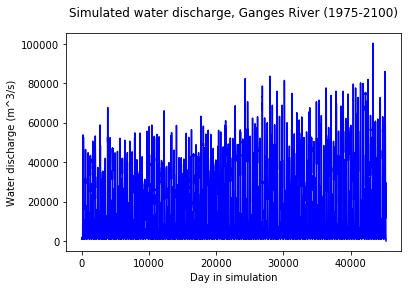

In [11]:
# Plot water discharge (q)
plt.plot(q_GQ0, color="blue")
plt.title('Simulated water discharge, Ganges River (1975-2100)', y=1.05)
plt.xlabel('Day in simulation')
plt.ylabel('Water discharge (m^3/s)')
plt.show()

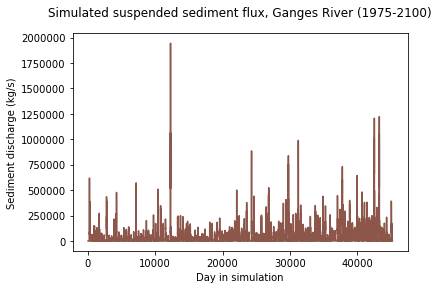

In [12]:
# Plot suspended sediment discharge (qs)
plt.plot(qs_GQ0,color="tab:brown")
plt.title('Simulated suspended sediment flux, Ganges River (1975-2100)', y = 1.05)
plt.xlabel('Day in simulation')
plt.ylabel('Sediment discharge (kg/s)')
plt.show()

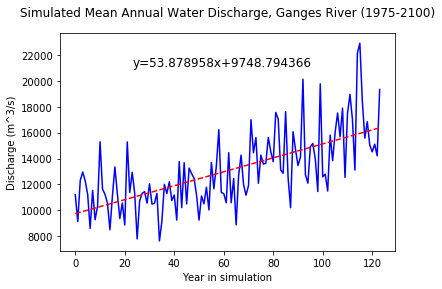

In [13]:
# Explore mean annual water discharge trends through time
import numpy as np
from numpy import reshape
# Reshape data array to find mean yearly water discharge
q_reshape_GQ0 = q_GQ0.reshape(124,365)
q_mean_rows_GQ0 = np.mean(q_reshape_GQ0, axis = 1)
q_y_vals = np.arange(124)
# Plot data, add trendline
plt.plot(q_y_vals, q_mean_rows_GQ0, color='blue')
plt.xlabel('Year in simulation')
plt.ylabel('Discharge (m^3/s)')
plt.title('Simulated Mean Annual Water Discharge, Ganges River (1975-2100)', y=1.05)
z = np.polyfit(q_y_vals.flatten(), q_mean_rows_GQ0.flatten(), 1)
p = np.poly1d(z)
plt.plot(q_y_vals, p(q_y_vals), "r--")
plt.suptitle("y=%.6fx+%.6f"%(z[0],z[1]), y = 0.8) 
plt.show()

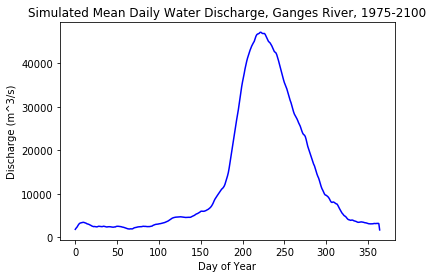

In [14]:
# Plot mean daily discharge over 125 year period
q_GQ0_daily = np.mean(q_reshape_GQ0, axis = 0)
plt.plot(q_GQ0_daily, color = 'blue')
plt.xlabel('Day of Year')
plt.ylabel('Discharge (m^3/s)')
plt.title('Simulated Mean Daily Water Discharge, Ganges River, 1975-2100')
plt.show()

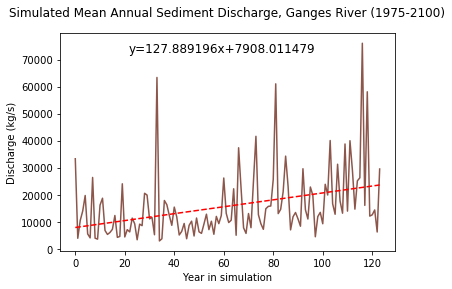

In [15]:
# Explore mean annual sediment discharge trends through time 
import numpy as np
from numpy import reshape
# Reshape data array to find mean yearly sediment discharge
qs_reshape_GQ0 = qs_GQ0.reshape(124,365)
qs_mean_rows_GQ0 = np.mean(qs_reshape_GQ0, axis = 1)
qs_y_vals = np.arange(124)
# Plot data, add trendline
plt.plot(qs_y_vals, qs_mean_rows_GQ0, color='tab:brown')
plt.xlabel('Year in simulation')
plt.ylabel('Discharge (kg/s)')
plt.title('Simulated Mean Annual Sediment Discharge, Ganges River (1975-2100)', y=1.05)
z = np.polyfit(qs_y_vals.flatten(), qs_mean_rows_GQ0.flatten(), 1)
p = np.poly1d(z)
plt.plot(qs_y_vals, p(qs_y_vals), "r--")
plt.suptitle("y=%.6fx+%.6f"%(z[0],z[1]), y=0.85) 
plt.show()

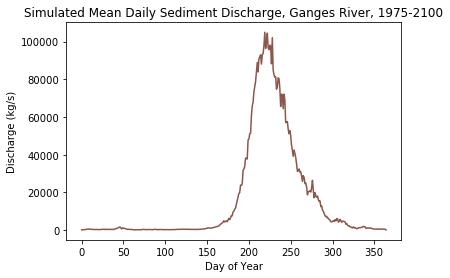

In [16]:
# Plot mean daily sediment discharge over 125 year period
qs_GQ0_daily = np.mean(qs_reshape_GQ0, axis = 0)
plt.plot(qs_GQ0_daily, color = 'tab:brown')
plt.xlabel('Day of Year')
plt.ylabel('Discharge (kg/s)')
plt.title('Simulated Mean Daily Sediment Discharge, Ganges River, 1975-2100')
plt.show()

In [17]:
# Get important mass balance information about your model run
print(q_GQ0.mean(), hydrotrend_GQ0.get_var_units("channel_exit_water__volume_flow_rate"), '= Mean Water Discharge')
print(qb_GQ0.mean(), hydrotrend_GQ0.get_var_units("channel_exit_water_sediment~bedload__mass_flow_rate"), '= Mean Bedload Discharge')
print(qs_GQ0.mean(), hydrotrend_GQ0.get_var_units("channel_exit_water_sediment~suspended__mass_flow_rate"), '= Mean Suspended Sediment Discharge')
print(cs_GQ0.mean(), hydrotrend_GQ0.get_var_units("channel_exit_water_sediment~suspended__mass_concentration"), '= Mean Suspended Sediment Concentration')
# Convert qs to MT/year
AnnualQs_GQ0 = (qs_GQ0.mean()*1e-9)/3.17098e-8
print(AnnualQs_GQ0, 'MT/year = Mean Annual Suspended Sediment Discharge')
print()

13062.3502639 m^3 / s = Mean Water Discharge
274.15531358 kg / s = Mean Bedload Discharge
15773.1970282 kg / s = Mean Suspended Sediment Discharge
0.371791180677 kg / m^3 = Mean Suspended Sediment Concentration
497.423415733 MT/year = Mean Annual Suspended Sediment Discharge



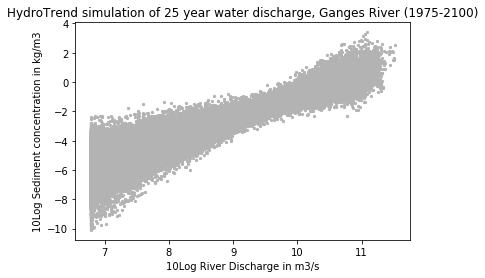

In [18]:
# Create discharge-sedimentload relationship for this simulation

# Typically presented as a loglog pot
plt.scatter(np.log(q_GQ0), np.log(cs_GQ0),s=5,color='0.7')
plt.title('HydroTrend simulation of 25 year water discharge, Ganges River (1975-2100)')
plt.xlabel('10Log River Discharge in m3/s')
plt.ylabel('10Log Sediment concentration in kg/m3')
plt.show()

### Now let's answer some questions about the above Ganges River simulation in HydroTrend
__________________________________________________________________________________________________________________

## Exercise 1: How water and sediment discharge is predicted to change over the next century in the Ganges Basin.

#### Q1a: How does water discharge and suspended sediment discharge in the Ganges River change over the 125 year time period? Describe the general trend.

*A1a*:

#### Q1b:  What is the percent change in average water discharge from the beginning to the end of the simulation? You will need to do some calculations in the cell below.

*A1b*: 

In [19]:
# work for Q1b:

#### Q1c:  What about the percent change in sediment discharge over the simulation time period?

*A1c*: 

In [20]:
# work for Q1c:

## Exercise 2: Explore the intra-annual variability of Ganges River discharge.

#### Q2a:  Describe the general water discharge trends over an average year. During what month(s) does discharge peak? When is discharge low? Use the plots above to support your answer.

*A2a*: 

#### Q2b: What climactic phenomenon drives the huge intra-annual variability in water discharge in the Ganges River?

*A2b*:

#### Q2c: Does sediment discharge also have high intra-annual variability? If so, why? Use the plots above to support your answer.

*A2c:

## Exercise 3: The impact of climate change on water and sediment discharge in the Ganges Basin.

#### Q3a: What are the two major climate inputs that drive the HydroTrend model? See beginning of the notebook for information and links regarding the HydroTrend model.

*A3a*:

#### Q3b: How must these climate inputs be changing in the future, given the impacts on water and sediment discharge over the simulation? Is this a surprising result?

*A3b*:

#### Q3c: What impacts might decrease water and/or sediment discharge in the Ganges River in the future? These impacts could be natural or anthropogenic. The links above might also be of help in answering this question.

*A3c*: